In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
#Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Direct path to the SQLite database file
database_path = "/Users/pablofortich/Desktop/SQL ALCHEMY CHALLENGE/Resources/hawaii.sqlite"

# Create an engine to connect to the SQLite database
engine = create_engine(f"sqlite:///{database_path}")

# Reflect the database tables into classes
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to the classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session to interact with the database
session = Session(engine)


In [38]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [39]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [40]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_data_point


('2017-08-23',)

2016-08-23 00:00:00


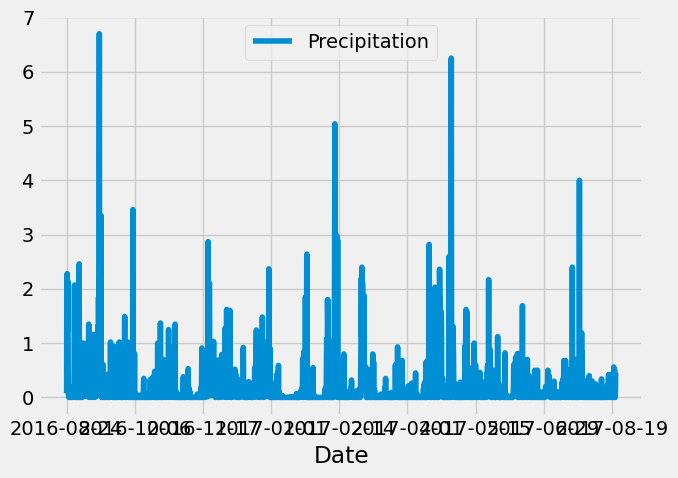

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Calculate the date one year from the last date in the dataset
year_ago = datetime(2017, 8, 23) - timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago, Measurement.prcp != None).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(7, 5))
plt.tight_layout()
plt.show()  # If you want to display the plot in addition to saving it


In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()


9

In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
result

[(54.0, 85.0, 71.66378066378067)]

# Close Session

In [48]:
year_temp = session.query(Measurement.tobs).\
      filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()


df1 = pd.DataFrame(year_temp, columns=['Tobs'])
df1.head()


,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


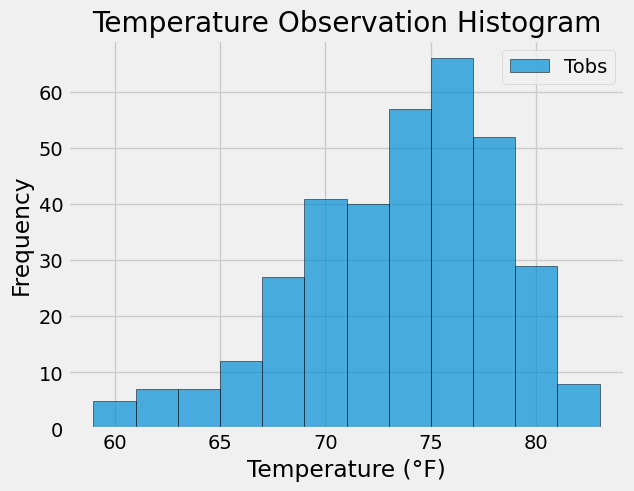

In [54]:
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with the 'Tobs' column
bins = 12
df1.plot.hist(y='Tobs', bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Histogram')
plt.show()


In [56]:
# Close the session
session.close()
